In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def my_range(start, end, step):
    while start <= end:
        yield start
        start += step
        
def setPlot(a, b):
    width = a
    height = b
    plt.figure(figsize=(width, height))

# 2. Movimiento de un proyectil

## a. Parámetros

|               Parámetros                           |       Valores      |
|---------------------------------------------------:|:------------------:|
| Posición inicial de lanzamiento (m)                |    [0,00; 0,00]    |
| Rapidez inicial (m/s)                              |     50,0           | 
| Radio (cm)                                         |     3,66           | 
| Coeficiente de resistencia (C<sub>D</sub>)         |     0,500          |
| Masa(kg)                                           |     0,145          |
| Ángulo de lanzamiento                              |    [20,0°; 70,0°]  |
| Densidad del aire (kg/m<sup>3</sup>)               |     1,20           | 

In [2]:
posicion_i_x = 0.0
posicion_i_y = 0.0
rapidez_i = 50.0
radio = 0.0366
resistencia = 0.50
masa = 0.145
angulo_i = float(format(random.uniform(20, 70), '.2f'))
densidad_aire = 1.20

gravedad = -9.81
area = math.pi * pow(radio, 2)
k = (resistencia * densidad_aire * area) / 2

In [3]:
print("Posición en x: {0:.2f}".format(posicion_i_x))
print("Posición en y: {0:.2f}".format(posicion_i_y))
print("Rapidez inicial: {0:.2f}".format(rapidez_i))
print("Coeficiente de resistencia: {0:.2f}".format(resistencia))
print("Masa: {0:.2f}".format(masa))
print("Ángulo inicial: ", angulo_i, "°")
print("Densidad del aire: {0:.2f}".format(densidad_aire))

print("Gravedad: ", gravedad)
print("Área: ", area)
print("Constante 'k': ", k)

Posición en x: 0.00
Posición en y: 0.00
Rapidez inicial: 50.00
Coeficiente de resistencia: 0.50
Masa: 0.14
Ángulo inicial:  47.45 °
Densidad del aire: 1.20
Gravedad:  -9.81
Área:  0.004208351855042743
Constante 'k':  0.001262505556512823


## b. Generación de datos (posición, velocidad y aceleración)

In [4]:
posicion_x = []
posicion_y = []
velocidad = []
velocidad_x = []
velocidad_y = []
aceleracion_x = []
aceleracion_y = []
fuerza = []
fuerza_x = []
fuerza_y = []
tiempo = []
datos = []

t = 0
dt = 0.0001
theta = angulo_i * math.pi / 180
v = rapidez_i
v_x = v * math.cos(theta)
v_y = v * math.sin(theta)
pos_x = 0
pos_y = 0
f_x = -k * v * v_x
f_y = masa * gravedad - k * v * v_y
f = math.sqrt(f_x * f_x + f_y * f_y)
a_x = f_x / masa
a_y = f_y / masa


def grabarDatos():
    posicion_x.append(pos_x)
    posicion_y.append(pos_y)
    velocidad.append(v)
    velocidad_x.append(v_x)
    velocidad_y.append(v_y)
    aceleracion_x.append(a_x)
    aceleracion_y.append(a_y)
    fuerza_x.append(f_x)
    fuerza_y.append(f_y)
    fuerza.append(f)
    tiempo.append(t)
    
while ( pos_y >= 0):

    grabarDatos()

    t = t + dt
    v_x = v_x + a_x * dt
    v_y = v_y + a_y * dt
    v = math.sqrt(v_x * v_x + v_y * v_y)
    pos_x = pos_x + ((velocidad_x[-1] + v_x) * dt / 2)
    pos_y = pos_y + ((velocidad_y[-1] + v_y) * dt / 2)    
    f_x = -k * v * v_x
    f_y = masa * gravedad - k * v * v_y
    f = math.sqrt(f_x * f_x + f_y * f_y)
    a_x = f_x / masa
    a_y = f_y / masa
    
df = pd.DataFrame({
'1. Tiempo': tiempo,
'2. X': posicion_x,
'3. Y': posicion_y,
'4. Vx': velocidad_x,
'5. Vy': velocidad_y,
'6. Ax': aceleracion_x,
'7. Ay': aceleracion_y
})

datos = pd.concat([df[df.index % 1000 == 0], df[df.index == len(tiempo) - 1]])

### Presentación de resultados

In [5]:
datos

,1. Tiempo,2. X,3. Y,4. Vx,5. Vy,6. Ax,7. Ay
0,0.0000,0.000000,0.000000,33.811667,36.834375,-14.719799,-25.845725
1000,0.1000,3.309968,3.557507,32.410901,34.347633,-13.326953,-23.933313
2000,0.2000,6.486511,6.875462,31.140156,32.039116,-12.114059,-22.273769
3000,0.3000,9.541782,9.970496,29.982968,29.885682,-11.051595,-20.825736
4000,0.4000,12.486426,12.857117,28.925517,27.867896,-10.115904,-19.556030
5000,0.5000,15.329818,15.548046,27.956115,25.969314,-9.287852,-18.437778
6000,0.6000,18.080251,18.054484,27.064803,24.175923,-8.551840,-17.449022
7000,0.7000,20.745096,20.386334,26.243039,22.475706,-7.895054,-16.571675
8000,0.8000,23.330930,22.552384,25.483444,20.858294,-7.306899,-15.790724
9000,0.9000,25.843642,24.560452,24.779611,19.314695,-6.778559,-15.093610


## c. Gráficos

In [6]:
def velY(t):
    return rapidez_i * math.sin(theta) + gravedad * t

def posX(t):
    return t * rapidez_i * math.cos(theta)

def posY(t):
    return (rapidez_i * math.sin(theta) + velY(t)) * t / 2

tf = rapidez_i * math.sin(theta) * -1 / gravedad * 2

### 1. Posición vs posición sin considerar la resistencia del aire

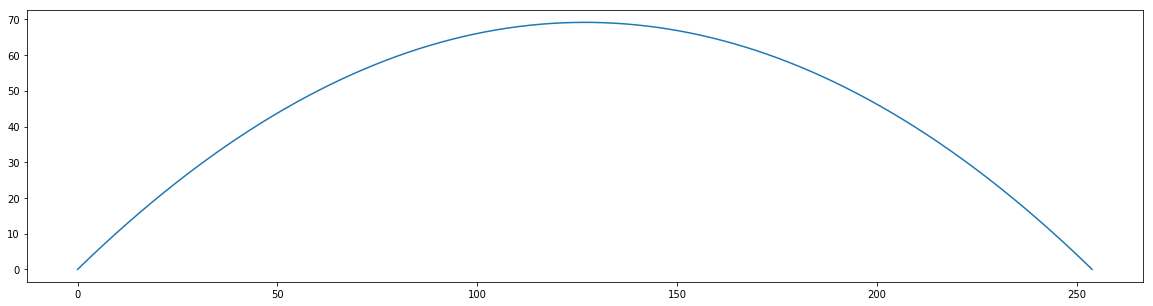

In [7]:
setPlot(20, 5)

p_X = [posX(t) for t in my_range(0, tf, 0.001)]
p_Y = [posY(t) for t in my_range(0, tf, 0.001)]

plt.plot(p_X, p_Y)
plt.show()

### 2. Posición vs posición considerando la resistencia del aire

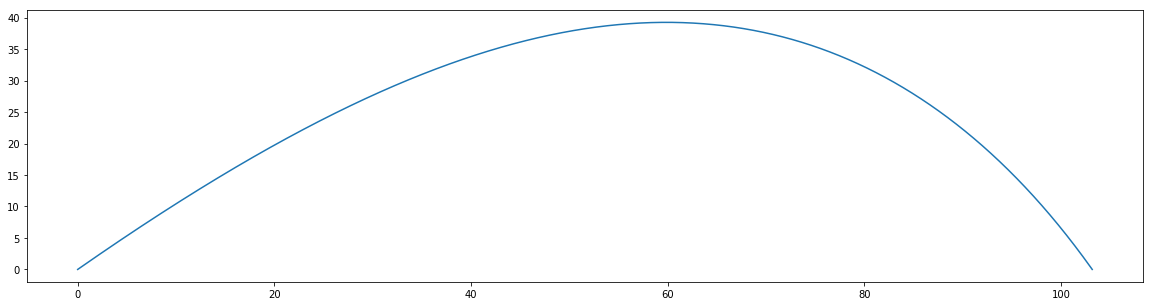

In [8]:
setPlot(20, 5)
plt.plot(posicion_x, posicion_y)
plt.show()

### 2.1 Comparativa de las gráficas de posiciones

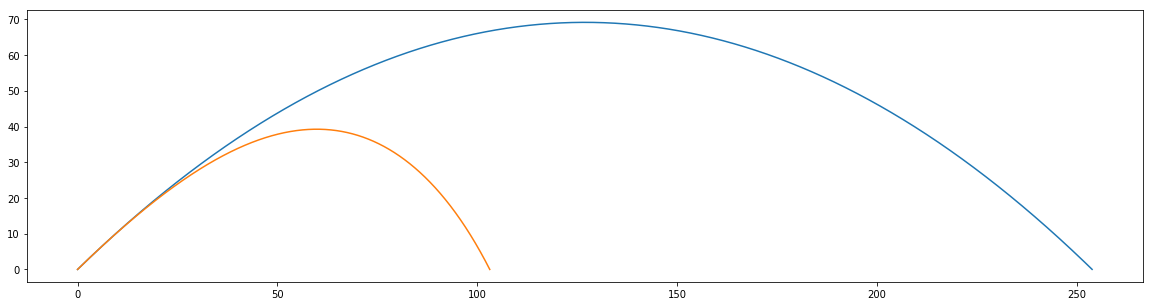

In [9]:
setPlot(20, 5)

plt.plot(p_X, p_Y)
plt.plot(posicion_x, posicion_y)
plt.show()

### 3. Fuerza de arrastre vs tiempo

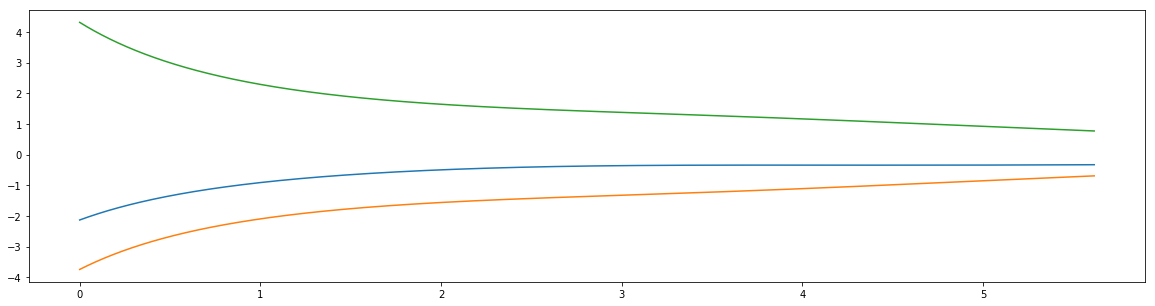

In [10]:
setPlot(20, 5)
plt.plot(tiempo, fuerza_x)
plt.plot(tiempo, fuerza_y)
plt.plot(tiempo, fuerza)
plt.show()